In [1]:
import pandas as pd

pd.set_option("mode.copy_on_write", True)

df = pd.read_excel("../src/emission_annual.xlsx")

In [2]:
df["CO2_annual"] = df.groupby(["Year", "State"])["CO2\n(Metric Tons)"].transform("sum")

df.head()

,Year,State,Producer Type,Energy Source,CO2\n(Metric Tons),SO2\n(Metric Tons),NOx\n(Metric Tons),CO2_annual
0,1990,AK,Commercial Cogen,All Sources,824004,13198,3011,16835236
1,1990,AK,Commercial Cogen,Coal,821929,13191,3009,16835236
2,1990,AK,Commercial Cogen,Petroleum,2075,6,2,16835236
3,1990,AK,Commercial Non-Cogen,All Sources,0,149,42,16835236
4,1990,AK,Commercial Non-Cogen,Petroleum,0,149,42,16835236


In [3]:
emission = df[["Year", "State", "CO2_annual"]].drop_duplicates()
emission.head()

,Year,State,CO2_annual
0,1990,AK,16835236
22,1990,AL,211744252
43,1990,AR,93703208
64,1990,AZ,132444852
84,1990,CA,210622572


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Pre = list(range(2000, 2009))
Post = list(range(2010, 2019))

In [5]:
def plot_emission(merged, Pre, Post, treated, control):
    fig, ax = plt.subplots()

    sns.regplot(
        x="Year",
        y="CO2_annual",
        data=merged[(merged["Year"].isin(Pre) & (merged["State"] == treated))],
        ax=ax,
        scatter=False,
        color="orange",
        label=f"Treated {treated}",
    )

    control_pre_data = merged[
        (merged["Year"].isin(Pre)) & (merged["State"].isin(control))
    ]
    control_pre_avg = (
        control_pre_data.groupby("Year")["CO2_annual"].mean().reset_index()
    )
    sns.regplot(
        x="Year",
        y="CO2_annual",
        data=control_pre_avg,
        ax=ax,
        scatter=False,
        color="blue",
        label=f"control ({', '.join(control)})",
    )

    sns.regplot(
        x="Year",
        y="CO2_annual",
        data=merged[(merged["Year"].isin(Post) & (merged["State"] == treated))],
        ax=ax,
        scatter=False,
        color="orange",
    )

    control_post_data = merged[
        (merged["Year"].isin(Post)) & (merged["State"].isin(control))
    ]
    control_post_avg = (
        control_post_data.groupby("Year")["CO2_annual"].mean().reset_index()
    )
    sns.regplot(
        x="Year",
        y="CO2_annual",
        data=control_post_avg,
        ax=ax,
        scatter=False,
        color="blue",
    )

    ax.axvline(x=2009, color="r", linestyle="--", label="Policy Change")

    plt.xlabel("Year")
    plt.ylabel("CO2 annual emission (Metric Tons)")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.legend()
    plt.show()

### Gas ratio similar

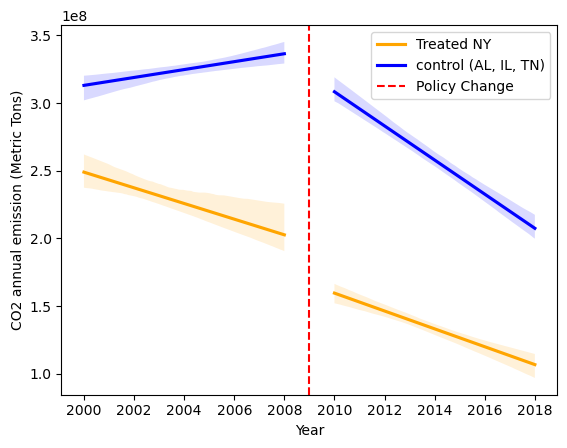

In [6]:
plot_emission(emission, Pre, Post, "NY", ["AL", "IL", "TN"])

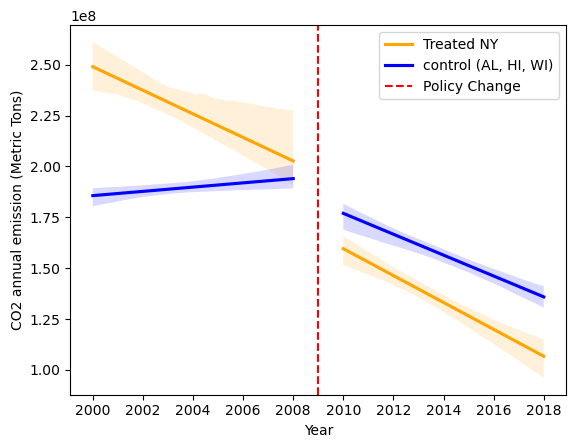

In [7]:
plot_emission(emission, Pre, Post, "NY", ["AL", "HI", "WI"])

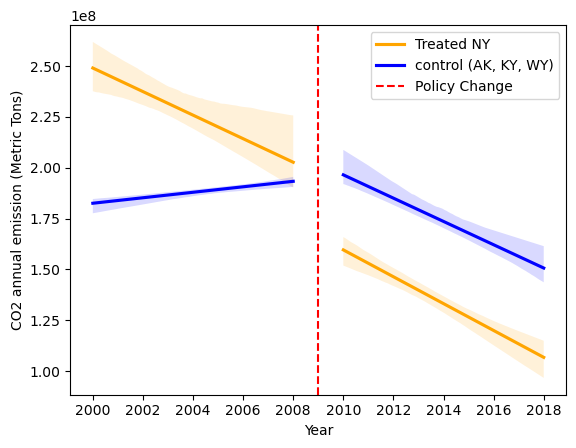

In [8]:
plot_emission(emission, Pre, Post, "NY", ["AK", "KY", "WY"])

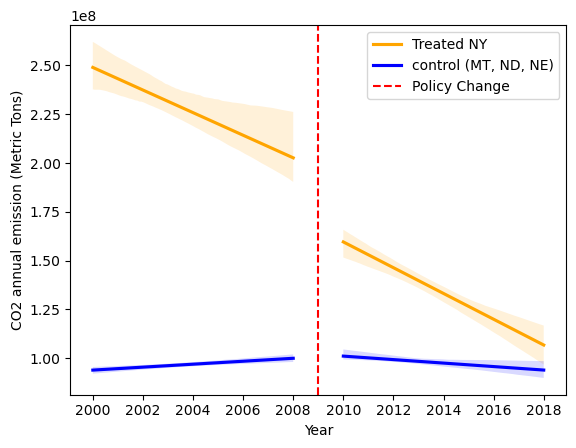

In [9]:
plot_emission(emission, Pre, Post, "NY", ["MT", "ND", "NE"])

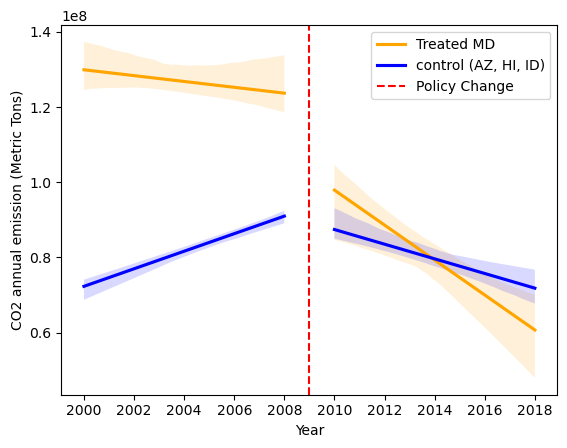

In [10]:
plot_emission(emission, Pre, Post, "MD", ["AZ", "HI", "ID"])
# Good

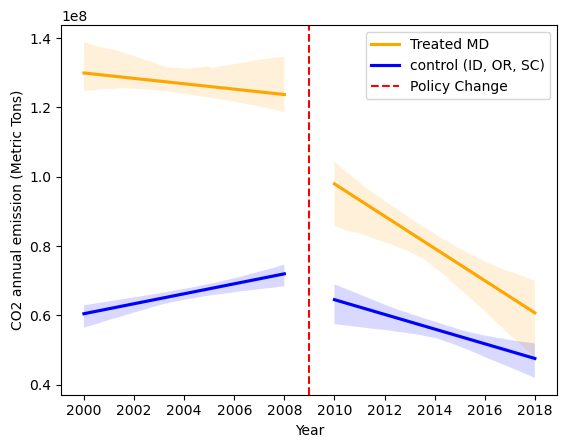

In [11]:
plot_emission(emission, Pre, Post, "MD", ["ID", "OR", "SC"])
# Good

### Fuel ratio similar

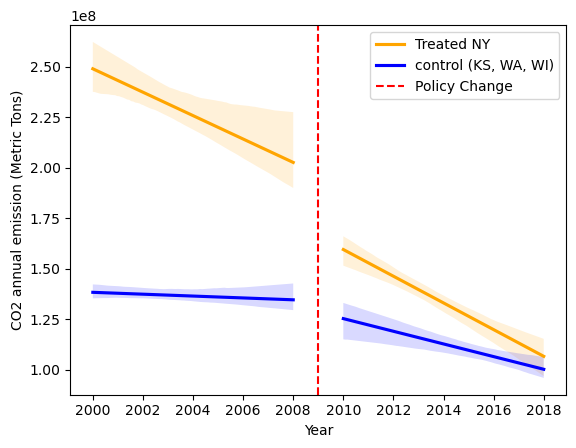

In [12]:
plot_emission(emission, Pre, Post, "NY", ["KS", "WA", "WI"])

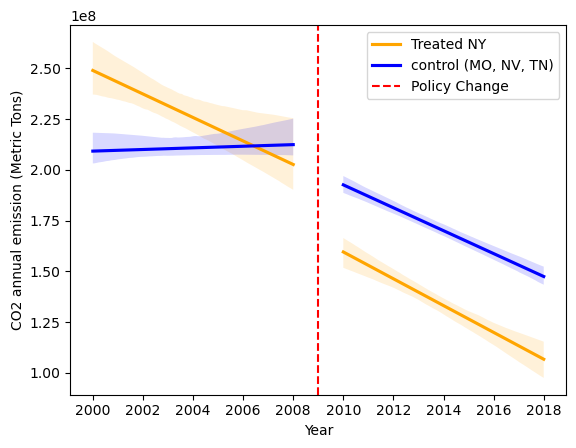

In [13]:
plot_emission(emission, Pre, Post, "NY", ["MO", "NV", "TN"])

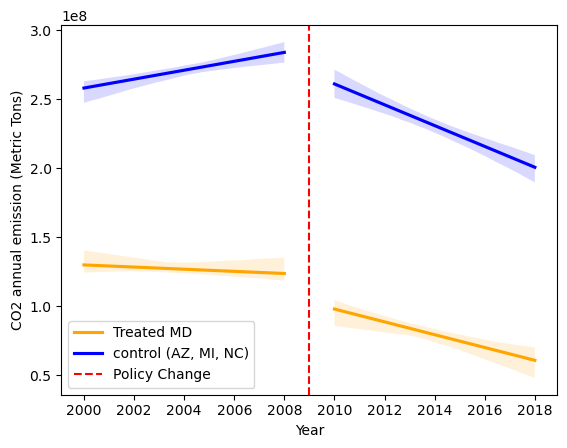

In [14]:
plot_emission(emission, Pre, Post, "MD", ["AZ", "MI", "NC"])

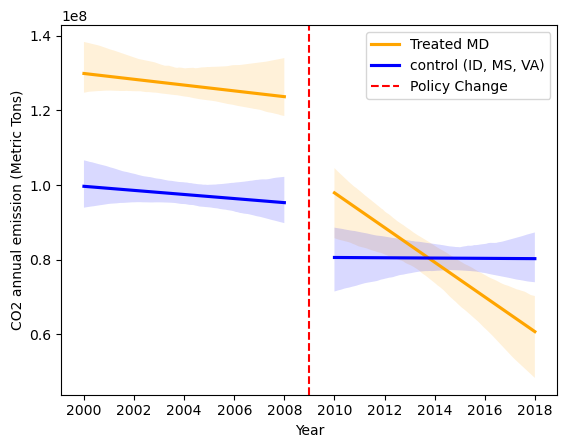

In [15]:
plot_emission(emission, Pre, Post, "MD", ["ID", "MS", "VA"])
# Good good

### Weighted ratio similar

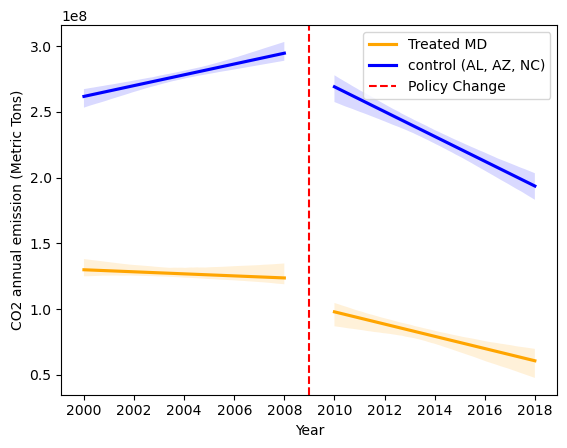

In [16]:
plot_emission(emission, Pre, Post, "MD", ["AL", "AZ", "NC"])

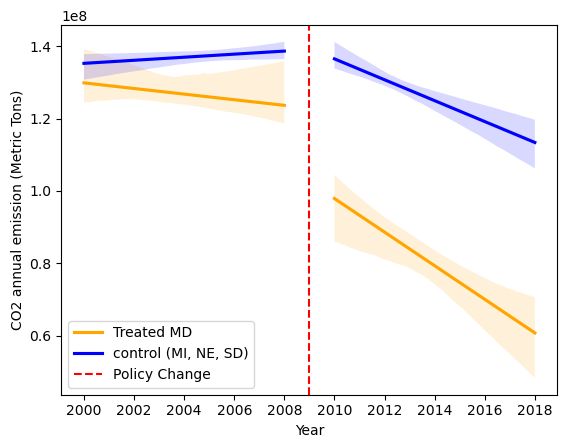

In [17]:
plot_emission(emission, Pre, Post, "MD", ["MI", "NE", "SD"])
# Good

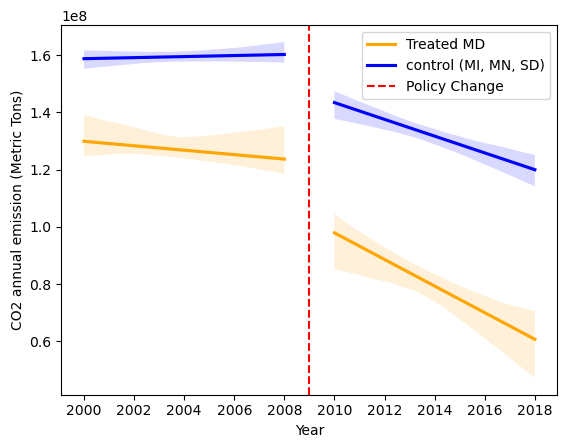

In [18]:
plot_emission(emission, Pre, Post, "MD", ["MI", "MN", "SD"])
# Good good

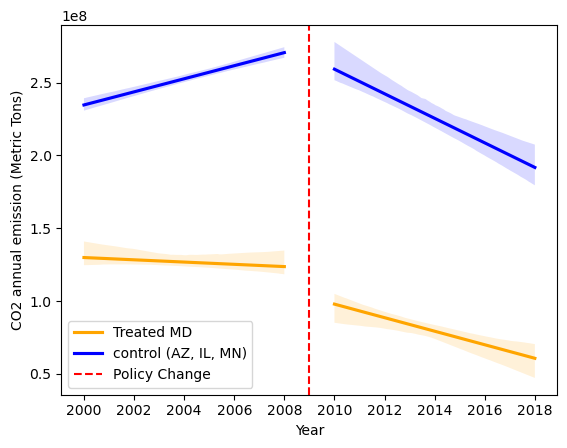

In [19]:
plot_emission(emission, Pre, Post, "MD", ["AZ", "IL", "MN"])

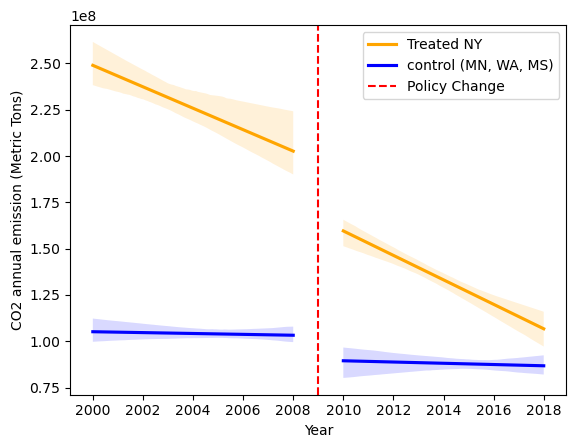

In [20]:
plot_emission(emission, Pre, Post, "NY", ["MN", "WA", "MS"])

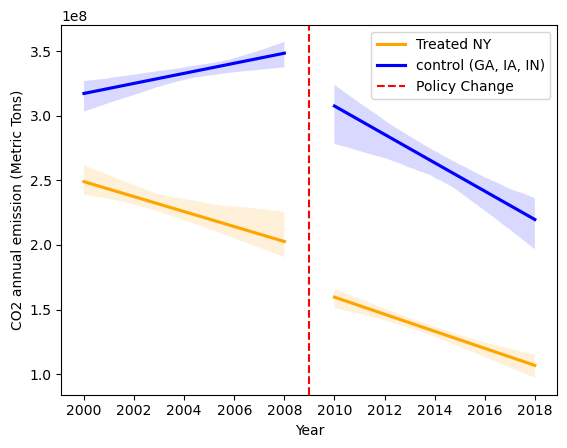

In [21]:
plot_emission(emission, Pre, Post, "NY", ["GA", "IA", "IN"])

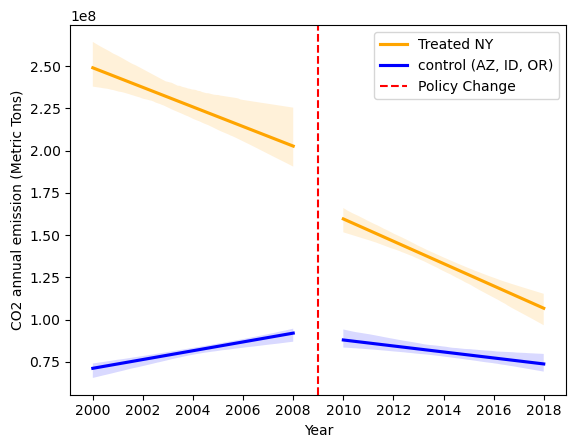

In [22]:
plot_emission(emission, Pre, Post, "NY", ["AZ", "ID", "OR"])

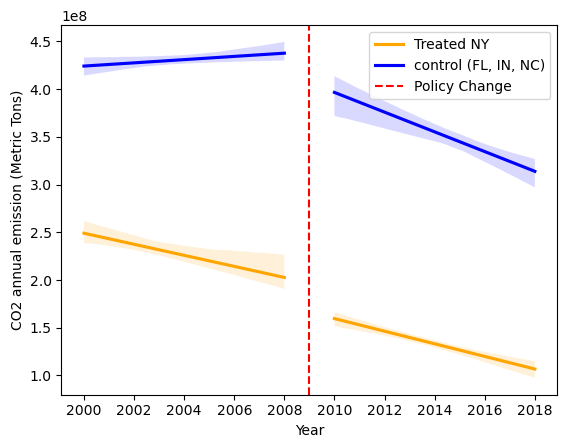

In [23]:
plot_emission(emission, Pre, Post, "NY", ["FL", "IN", "NC"])

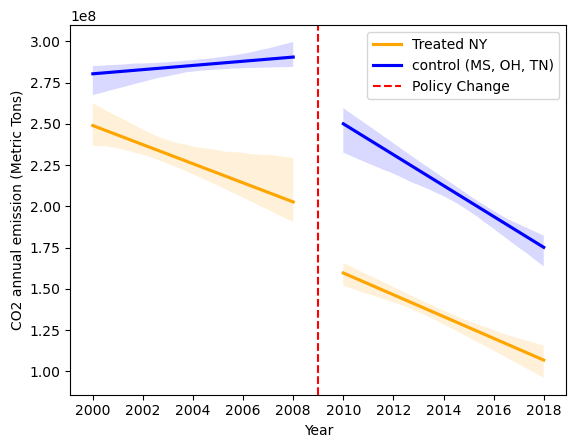

In [24]:
plot_emission(emission, Pre, Post, "NY", ["MS", "OH", "TN"])

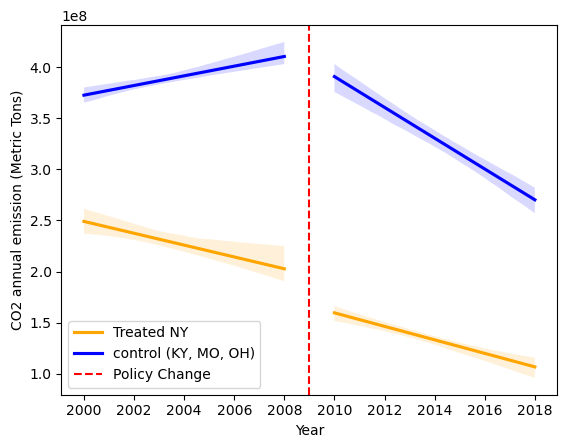

In [25]:
plot_emission(emission, Pre, Post, "NY", ["KY", "MO", "OH"])

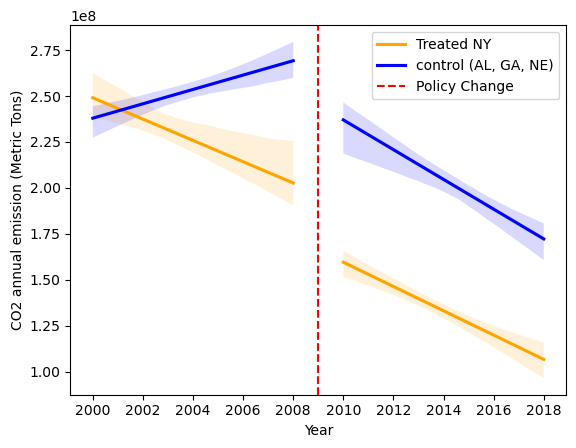

In [26]:
plot_emission(emission, Pre, Post, "NY", ["AL", "GA", "NE"])

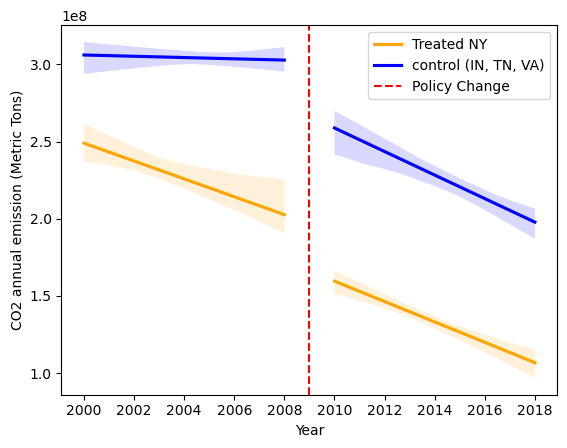

In [27]:
plot_emission(emission, Pre, Post, "NY", ["IN", "TN", "VA"])

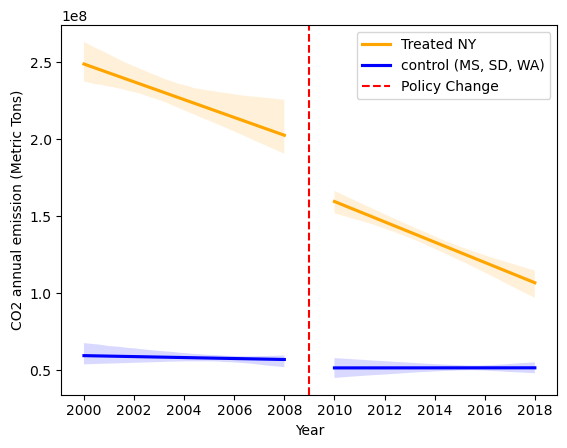

In [28]:
plot_emission(emission, Pre, Post, "NY", ["MS", "SD", "WA"])